<a href="https://colab.research.google.com/github/EmilEdvardsson/10oct-22apr/blob/main/AllSchoolsProjectSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
#!pip install catboost
#from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data2 = pd.read_csv('/content/gdrive/MyDrive/daily_data_all_schools.csv')

Mounted at /content/gdrive


In [ ]:
data2 = data2.drop(['Unnamed: 0'],axis=1)

In [ ]:
data2 = data2.drop(list(range(55,60)), axis = 0) #Höstlov 1-5e november
data2 = data2.drop([29], axis = 0)#Lov 24e september
data2 = data2.reset_index(drop=True)

In [ ]:
data2

,Date,Month,Day,Central,Domar,Ärentuna,Stenhagen,Total Power,20K+,30K+,...,OSTCRÈME,SKAGEN,NASI,GORENG,RISOTTO,MOUSSAKA,INDISKA,OLIVER,SALLADSOST,LINSFÄRSLIMPA
0,2021-10-05,10,5,1,0,0,0,1193843.0,23085.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2021-10-06,10,6,1,0,0,0,1438341.0,109476.0,24926.0,...,0,0,0,0,0,0,0,0,0,0
2,2021-10-07,10,7,1,0,0,0,1346118.0,48050.0,6396.0,...,0,0,0,0,0,0,0,0,0,0
3,2021-10-08,10,8,1,0,0,0,2272796.0,749119.0,375674.0,...,0,0,0,0,0,0,0,0,0,0
4,2021-10-11,10,11,1,0,0,0,3491586.0,1615107.0,969670.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2022-04-14,4,14,0,0,0,1,1076040.0,421440.0,205410.0,...,0,0,0,0,0,0,0,0,0,0
502,2022-04-19,4,19,0,0,0,1,2586586.0,1217048.0,747644.0,...,0,0,0,0,0,0,0,0,0,0
503,2022-04-20,4,20,0,0,0,1,2102808.0,785758.0,362714.0,...,0,0,0,0,0,0,0,0,0,0
504,2022-04-21,4,21,0,0,0,1,2323610.0,1001642.0,581386.0,...,0,0,0,0,0,0,0,1,1,0


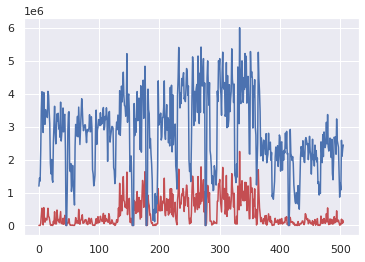

In [ ]:
plt.plot(data2['50K+'],'r')
plt.plot(data2['Total Power'])

In [ ]:
X = data2[data2['Stenhagen'] == 1].drop(['Date','Datum','Grönt','Rätt','Extra','Month','Day','Total Power','100K+','90K+','80K+','70K+','60K+','50K+','40K+','30K+','20K+'], axis=1)
y = data2[data2['Stenhagen'] == 1]['60K+']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

Model

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
model = LGBMRegressor(random_state=0)
model.fit(X_train,y_train)

LGBMRegressor(random_state=0)

In [ ]:
model = XGBRegressor(random_state = 0)
model.fit(X_train,y_train)

[19:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
model = KernelRidge()
model.fit(X_train,y_train)

KernelRidge()

In [ ]:
#model = CatBoostRegressor()
#model.fit(X_train,y_train)

In [ ]:
model = CatBoostRegressor()
model.fit(X_train,y_train)

NameError: ignored

In [ ]:
model = BayesianRidge()
model.fit(X_train,y_train)

In [ ]:
model = SVR()
model.fit(X_train,y_train)

In [ ]:
model = SGDRegressor(random_state=0)
model.fit(X_train,y_train)

In [ ]:
model = ElasticNet(random_state=0)
model.fit(X_train,y_train)

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

In [ ]:
model = RandomForestRegressor(random_state = 13)
model.fit(X_train,y_train)

Prediction

In [ ]:
prediction = model.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE

In [ ]:
method = 'RF Regressor'
plt.plot(y_test[:50].reset_index(drop=True))
plt.plot(prediction[:50],'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))
print('MAE = ' + str(mean_absolute_error(y_test, prediction)/(10**6)))

In [ ]:
error = (y_test.reset_index(drop=True) - prediction)*5/(60*10**3)
plt.plot(error)

In [ ]:
from sklearn.model_selection import ParameterGrid
randomgrid = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': ['None',1,2,3],
    'min_samples_split': [2,3,4,5],
    'random_state': [13]}

pg = ParameterGrid(randomgrid)
len(pg)*3/60

**Gradient Boosting Tuning**

In [ ]:
#HYPERPARAMETER TUNING#

#Gradient Boosting#
randomgrid = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.05, 0.1, 0.3, 0.4],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_depth': [2,3],
    'random_state': [13]}

model = GradientBoostingRegressor()
rf_random = skl_ms.GridSearchCV(estimator=model , param_grid=randomgrid,
                                cv=5, verbose = 10, scoring = 'neg_mean_absolute_error')
rf_random.fit(X , y)

In [ ]:
print(f'Best set of hyperparameters are: {rf_random.best_params_}')

In [ ]:
X_test[X_test['Stenhagen'] == 1].index

In [ ]:
y_test[X_test[X_test['Stenhagen'] == 1].index]

MAE = 0.02969901407532877


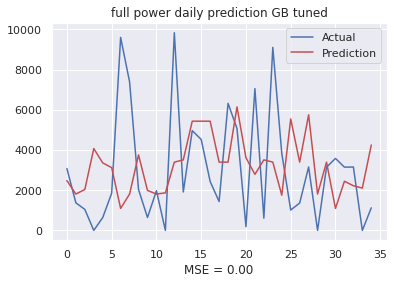

In [ ]:
model = GradientBoostingRegressor(criterion='friedman_mse', learning_rate= 0.2, loss= 'absolute_error', max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=13)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE
method = 'GB tuned'
plt.plot(y_test.reset_index(drop=True)*5/60)
plt.plot(prediction*5/60,'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))
print('MAE = ' + str(mean_absolute_error(y_test, prediction)/(10**6)))

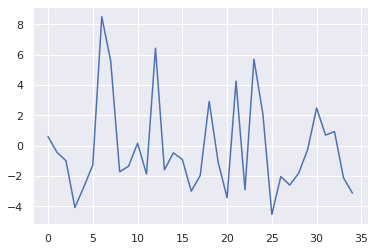

In [ ]:
error = (y_test.reset_index(drop=True)-prediction)*5/(60*1000)
plt.plot(error)

In [ ]:
plt.plot(data2['100K+'])

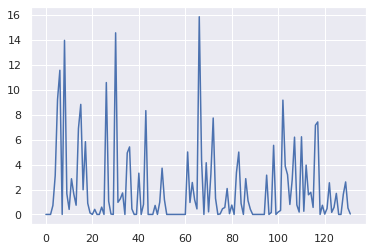

In [ ]:
plt.plot(data2[data2['Central'] == 1]['70K+']*5/(60*1000))

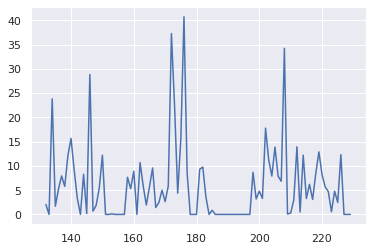

In [ ]:
plt.plot(data2[data2['Domar'] == 1]['100K+']*5/(60*1000))

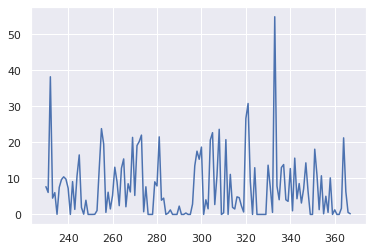

In [ ]:
plt.plot(data2[data2['Ärentuna'] == 1]['100K+']*5/(60*1000))

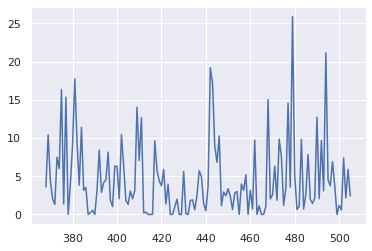

In [ ]:
plt.plot(data2[data2['Stenhagen'] == 1]['60K+']*5/(60*1000))

In [ ]:
percent_error = (prediction/(y_test.reset_index(drop=True)) - 1)*100
# Replacing infinite with nan
percent_error.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
percent_error.dropna(inplace=True)
percent_error.drop([57], axis=0, inplace=True)
plt.plot(percent_error)

In [ ]:
percent_error[57]

In [ ]:
y_test.reset_index(drop=True)[11]

In [ ]:
prediction[11]

**XGBoost Tuning**

In [ ]:
#HYPERPARAMETER TUNING#

#Gradient Boosting#
randomgrid = {
    'booster': ['gbtree', 'dart'],
    'eta': [0.05, 0.1, 0.3, 0.4],
    'max_leaf_nodes': [2,3,4,5,6],
    'random_state': [13]}

model = XGBRegressor()
rf_random = skl_ms.GridSearchCV(estimator=model , param_grid=randomgrid,
                                cv=5, verbose = 10)
rf_random.fit(X , y)

In [ ]:
print(f'Best set of hyperparameters are: {rf_random.best_params_}')

In [ ]:
model = XGBRegressor(booster = 'gbtree', eta = 0.05, max_leaf_nodes = 2, random_state = 13)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE
method = 'XGB tuned'
plt.plot(y_test.reset_index(drop=True))
plt.plot(prediction,'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))

**KNN Tuning**

In [ ]:
#HYPERPARAMETER TUNING#

#Gradient Boosting#
randomgrid = {
    'n_neighbors': list(range(2,25)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

model = KNeighborsRegressor()
rf_random = skl_ms.GridSearchCV(estimator=model , param_grid=randomgrid,
                                cv=5, verbose = 10)
rf_random.fit(X , y)

In [ ]:
print(f'Best set of hyperparameters are: {rf_random.best_params_}')

In [ ]:
model = KNeighborsRegressor(algorithm = 'ball_tree', n_neighbors = 15, weights = 'distance')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE
method = 'KNN tuned'
plt.plot(y_test.reset_index(drop=True))
plt.plot(prediction,'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))

**SGD Tuning**

In [ ]:
#HYPERPARAMETER TUNING#

#Gradient Boosting#
randomgrid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling','adaptive']}

model = SGDRegressor()
rf_random = skl_ms.GridSearchCV(estimator=model , param_grid=randomgrid,
                                cv=5, verbose = 10)
rf_random.fit(X , y)

In [ ]:
print(f'Best set of hyperparameters are: {rf_random.best_params_}')

In [ ]:
model = SGDRegressor(learning_rate = 'invscaling', loss = 'squared_error')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE
method = 'SGD tuned'
plt.plot(y_test.reset_index(drop=True))
plt.plot(prediction,'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))

**Random Forest Tuning**

In [ ]:
#HYPERPARAMETER TUNING#

#Gradient Boosting#
randomgrid = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': ['None',1,2,3,4,5],
    'min_samples_split': [2,3,4,5,6,7],
    'random_state': [13]}

model = RandomForestRegressor()
rf_random = skl_ms.GridSearchCV(estimator=model , param_grid=randomgrid,
                                cv=5, scoring = 'neg_mean_absolute_error', verbose = 10)
rf_random.fit(X , y)

In [ ]:
print(f'Best set of hyperparameters are: {rf_random.best_params_}')

In [ ]:
model = RandomForestRegressor(criterion = 'absolute_error', max_depth = 3, min_samples_split = 2, random_state = 13)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE
method = 'RF tuned'
plt.plot(y_test[0:50].reset_index(drop=True))
plt.plot(prediction[0:50],'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))
print('MAE = ' + str(mean_absolute_error(y_test, prediction)/(10**6)))

In [ ]:
list(y_test).index(y_test[145])

In [ ]:
y_test[101]

In [ ]:
prediction

In [ ]:
data2.iloc[145]

In [ ]:
abs(prediction-y_test).idxmax()

In [ ]:
abs(prediction-y_test).nlargest(n=10)

In [ ]:
data2.loc[55]

**Limited power prediction**

In [ ]:
X = data2.drop(['Datum','POWER','POWER 100K+','POWER 90K+','POWER 80K+','POWER 70K+','POWER 60K+','POWER 50K+','POWER 40K+','POWER 30K+','POWER 20K+'], axis=1)
y = data2['POWER 20K+']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = RandomForestRegressor(criterion = 'squared_error', max_depth = 3, min_samples_split = 2, random_state = 13)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)/(10**12)
MSE = "%.2f" % MSE
method = 'RF tuned 20k+'
plt.plot(y_test.reset_index(drop=True))
plt.plot(prediction,'r')
plt.title('full power daily prediction ' + str(method))
plt.legend(['Actual', 'Prediction'])
plt.xlabel('MSE = ' + str(MSE))

In [ ]:
plt.plot(data2['POWER 50K+'])